## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
print('Number of unique users in the dataset : ',df['user_id'].nunique())

Number of unique users in the dataset :  290584


d. The proportion of users converted.

In [5]:
prop = df.query('converted == 1')['user_id'].nunique()/df.user_id.nunique()
prop

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df1 = df[((df['group'] == 'treatment') & (df['landing_page'] != 'new_page'))
         |
         ((df['group'] != 'treatment') & (df['landing_page'] == 'new_page'))
        
        ]
df1.shape[0]
df1['user_id'].nunique()

3893

f. Do any of the rows have missing values?

In [7]:
df1.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))
         |
         ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))
        
        ]
df2.shape[0]

290585

In [9]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
print('Number of unique users in the dataset : ',df2['user_id'].nunique())

Number of unique users in the dataset :  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2['is_duplicated'] = df2.duplicated(['user_id'])

C:\Users\Mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df2['is_duplicated'].value_counts()

False    290584
True          1
Name: is_duplicated, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
df_dup = df2.loc[df2['is_duplicated'] == True]
df_dup

,user_id,timestamp,group,landing_page,converted,is_duplicated
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2[df2['is_duplicated'] == False]
df2.head()

,user_id,timestamp,group,landing_page,converted,is_duplicated
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2[df2['converted']==1].shape[0]/ df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2[(df2['converted']==1) & (df2['group']== 'control') ].shape[0]/ (df2[df2['group']=='control'].shape[0])

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2[(df2['converted']==1) & (df2['group']== 'treatment') ].shape[0]/ (df2[df2['group']=='treatment'].shape[0])

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2[(df2['landing_page']=='new_page')].shape[0]/ df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.



   1. The probability of an individual converting regardless of the page they receive is 0.11959708724499628 or 11.96%

   2. Given that an individual was in the control group, the probability they converted is 0.1203863045004612 or 12.04%

   3. Given that an individual was in the treatment group, the probability they converted is 0.11880806551510564 or 11.88%.

   4. The probablity users converted in both control and treatment group are almost close or similar to each other and probability of an individual converting regardless of the page they receive. Therefore, there is no evidence that new page leads to more conversions.



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} &gt;= 0$$
$$H_1: p_{old} - p_{new} &lt; 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_New = df2[df2['converted'] == 1].user_id.nunique()/df2.user_id.nunique()
print('Convert rate for p_new under the null : ',p_New)

Convert rate for p_new under the null :  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_Old = df2[df2['converted'] == 1].user_id.nunique()/df2.user_id.nunique()
print('Convert rate for p_old under the null : ',p_Old)

Convert rate for p_old under the null :  0.11959708724499628


c. What is $n_{new}$?

In [22]:
n_New = df2.query('landing_page == "new_page"')['user_id'].nunique()
print('n_new : ', n_New)

n_new :  145310


d. What is $n_{old}$?

In [23]:
n_Old = df2.query('landing_page == "old_page"')['user_id'].nunique()
print('n_old :: ', n_Old)

n_old ::  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0,1],n_New, p=(p_New,1-p_New))
new_page_converted
np.unique(new_page_converted)

array([0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0,1],n_New, p=(p_Old,1-p_Old))
old_page_converted
np.unique(old_page_converted)

array([0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
obs_diff = new_page_converted.mean()-old_page_converted.mean()
obs_diff

0.0024636983001857793

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []
size = df.shape[0] 
for _ in range(10000):
    samp = df2.sample(size, replace = True)

    new_page_converted = np.random.choice([0,1],n_New, p=(p_New,1-p_New))

    old_page_converted = np.random.choice([0,1],n_Old, p=(p_Old,1-p_Old))

    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

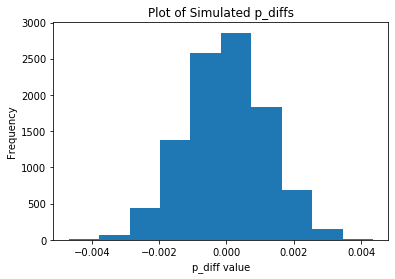

In [28]:
plt.xlabel('p_diff value')
plt.ylabel('Frequency')
plt.title('Plot of Simulated p_diffs')
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# Create number of users with all new_page users and all old_page users with a converted status

convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

In [30]:
convert_new

17264

In [31]:
convert_old

17489

In [51]:
# Compute actual converted rate
actual_cvt_new = float(convert_new)/ float(n_New) 
actual_cvt_old = float(convert_old)/ float(n_Old)

In [52]:
# Compute observed difference in converted rate 
obs_diff = actual_cvt_new - actual_cvt_old
obs_diff

-0.0015782389853555567

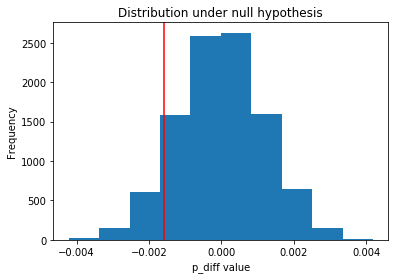

In [53]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffs), np.array(p_diffs).size)
#Plot Null distribution
plt.xlabel('p_diff value')
plt.ylabel('Frequency')
plt.title('Distribution under null hypothesis');
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red');

In [55]:
(null_vals > obs_diff).mean()

0.9091

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?




   1. In the problem, we are given with Type I error rate of 5%, and the obtained p-value > Alpha, we fail to reject the null.

   2. Hence the data shows, with a type I error rate of 0.05, that the old page has higher probablity of convert rate than new page.

   3. P-Value: The probability of observing our statistic or a more extreme statistic from the null hypothesis.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [56]:
import statsmodels.api as sm

# Create number of users with all new_page users and all old_page users with a converted status

convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()

convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [57]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [58]:
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [59]:
from scipy.stats import norm

norm.cdf(z_score)
# 0.9999999383005862 # Tells us how significant our z-score is

0.09494168724097551

In [60]:
norm.ppf(1-(0.05/2))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?


   1. Since the z-score of 1.3109241984234394 does not exceed the critical value of 1.959963984540054,

   2. We fail to reject the null hypothesis that old page users has a better or equal converted rate than old page users.

   3. Therefore, the converted rate for new page and old page have no difference.

   4. This result is the same as parts J. and K. result.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Logistic Regression -  
As the target variable is categorical (whether it is converted or not)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [74]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted,is_duplicated,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1


In [75]:
#create a column for the intercept
df2['intercept'] = 1

#create a dummy variable column for which page each user received
df2= df2.join(pd.get_dummies(df2['landing_page']))

#ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [76]:
#Create Logit regression model for conveted variable and  ab_page, and us control as baseline
log = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [77]:
result = log.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:26:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

1. The p-value associated with ab_page is 0.19.

2. The null hypothesis associated here - is that there is no difference between the treatment and control group.

3. Alternative hypotheses is that there is difference between the treatment and control group

4. Part II assumes that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, so when compared from both the above sceanrios,they have different explainory varibale or factor for the result

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?



   1. Other factors which might influence is time(timestamp variable). We can observe if there is any difference in browsing time of each user, so that the conversion rate will vary as per the time.

   2. For this timestamp variable, we can further convert time as categorical variable which includes "Morning, afternoon, and evening", or "weekday and weekend".

   3. The main disadavantage for adding additional terms into regression model is that it will make our model more comlplex which can complicate in interpreting the model output. There is a chance of having multicollinearity and overfitting if these new variables are not taken care off.



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [78]:
countries_df = pd.read_csv('countries.csv')
countries_df.head(4)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK


In [79]:
np.unique(countries_df['country'])

array(['CA', 'UK', 'US'], dtype=object)

In [80]:
#Join ab dataset with country dataset
df3 = df2.merge(countries_df, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,is_duplicated,intercept,ab_page,new_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,0,1,US


In [81]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])

df3 = df3.drop(df3['CA'])

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [82]:
df3.head()

,user_id,timestamp,group,landing_page,converted,is_duplicated,intercept,ab_page,new_page,old_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,1,0,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,1,0,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,0,1,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,False,1,0,0,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False,1,1,1,0,CA,1,0,0


In [83]:
#Create intercept variable
df3['intercept'] = 1
#Create Logit regression model for converted and country, and us CA and old page as baseline
logit_model = sm.Logit(df3['converted'], df3[['intercept','new_page','UK','US']])

result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            3
Date:                Fri, 15 May 2020   Pseudo R-squ.:               2.325e-05
Time:                        23:26:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1757
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.248      0.000      -2.082      -1.978
new_page      -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.075      -0.005       0.106
US             0.0408      0.027      1.516      0.129      -0.012       0.093
==============================================================================
"""

In [84]:
#exponentiated the CV to inteprete the result

np.exp(result.params)

intercept    0.131333
new_page     0.985152
UK           1.051944
US           1.041611
dtype: float64

All of the p-values are insignificant for each of the variables, except intercept

In [85]:
#Create a new interaction variable between new page and country CA, US and UK
df3['CA_new_page'] = df3['new_page']* df3['CA']
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']


In [86]:
df3.head(3)

,user_id,timestamp,group,landing_page,converted,is_duplicated,intercept,ab_page,new_page,old_page,country,CA,UK,US,CA_new_page,UK_new_page,US_new_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,1,0,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,1,0,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,0,1,US,0,0,1,0,0,0


In [87]:
#Create logistic regression for the intereaction variable between new page and country using dummy variable

logit_model2 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK_new_page','US_new_page','UK','US']])

result = logit_model2.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290576
Method:                           MLE   Df Model:                            5
Date:                Fri, 15 May 2020   Pseudo R-squ.:               3.484e-05
Time:                        23:27:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1917
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_new_page     0.0469      0.054      0.871      0.384      -0.059       0.152
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0176      0.038      0.466      0.641      -0.056       0.091
===============================================================================
"""

In [88]:
#exponentiated the CV to inteprete the result
np.exp(result.params)

intercept      0.134794
new_page       0.934776
UK_new_page    1.081428
US_new_page    1.047978
UK             1.011854
US             1.017705
dtype: float64


### Interpretations:

   1. From the above Logit Regression Results, we can see that the only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate but other variables are not statistically significant.

   2. The country a user lives is not statistically significant on the converted rate considering the page the user land in.

   3. For every unit for new_page decreases, the user getting converted will be 7.0% more likely to happen while holding all other varibles constant.

   4. The user getting Converted is 1.08 times more likely to happen for UK and new page users than CA and new page users while holding all other varible constant.

   5. The user getting Converted is 1.04 times more likely to happen for US and new page users than CA and new page users while holding all other varible constant.


In [98]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0